## Goal

This notebook records my many different trials for the Titanic competition on Kaggle

https://www.kaggle.com/c/titanic

The main Goal is to familize myself with Kaggle and sklearn. So the appraoch is
- Fill the missing the values
- Try different machine learning algorithms and tune the hyperparameters
- Appiled the method above on three sets of features: all features, short = short = ["Pclass", "Age", "SibSp","Parch","Fare","Sex_female"] and tutorial features = ["Pclass", "Sex_female", "SibSp", "Parch", "Sex_male"]

Possible improvements:
- different ways to fill the missing values
- create new features

## data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sb

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
#gender = pd.read_csv('data/gender_submission.csv')

In [3]:
## tit_train = titanic_train.to_numpy()

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Remove NaN

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

So we need to remove missing value on four columns: 
* 'Age', 'Cabin' and 'Embarked' for train data; 
* 'Fare' for test data

In [8]:
## Replace the missing value in 'Age' column by average age.
agemean = train['Age'].mean()
train['Age'].fillna(agemean, inplace = True)
test['Age'].fillna(agemean, inplace = True)

In [9]:
## Get the first letter as cabinClass 
## Replace the missing value in 'Cabin' column by 'Z' (or if only numbers are provided)
def cabinClass(c):
    if isinstance(c, (float, int)):
        return 'Z'
    elif isinstance(c, (str)):
        return c[0]
train['Cabin'] = train['Cabin'].map(cabinClass)    
test['Cabin'] = test['Cabin'].map(cabinClass)  

In [10]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [11]:
## Replace the NaN for the Embarked column to 'N'
def fillN(x):
    if isinstance(x, float):
        return 'N'
    else:
        return x
train['Embarked'] = train['Embarked'].map(fillN)

In [12]:
## Check all missing value in train data has been removed
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [14]:
## Check all missing value in test data has been removed
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Remove some features and put to variables

In [15]:
X_train = pd.get_dummies(train.drop(columns = ['Name', 'PassengerId', 'Ticket', 'Survived']))
X_test = pd.get_dummies(test.drop(columns = ['Name', 'PassengerId', 'Ticket']))
y_train = train['Survived']

In [16]:
X_test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_Z       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
print(X_train.shape,  X_test.shape)

(891, 20) (418, 18)


In [18]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value = 0)

In [19]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [20]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [21]:
print(X_train.shape,  X_test.shape)

(891, 20) (418, 20)


In [22]:
X_test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_Z       0
Embarked_C    0
Embarked_N    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Split train data 

In [23]:
from sklearn.model_selection import train_test_split
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, random_state=1)

In [24]:
print(X_train1.shape,  y_train1.shape)

(668, 20) (668,)


In [25]:
print(X_train2.shape,  y_train2.shape)

(223, 20) (223,)


### scaled data

In [26]:
continuous_features = ['Age', 'Fare']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[continuous_features])
X_cont_scaled = scaler.transform(X_train[continuous_features])
X_cont_scaled1 = scaler.transform(X_train1[continuous_features])
X_cont_scaled2 = scaler.transform(X_train2[continuous_features])

### 5-fold split

In [28]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
>>> y = np.array([11, 12, 13, 14])
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [29]:
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X_train):
    print("TRAIN size:", train_index, "TEST size:", test_index)

TRAIN size: [297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 539 54

In [30]:
X_train.shape

(891, 20)

### feature sets

In [31]:
continuous_features = ['Age', 'Fare']

In [32]:
short = ["Pclass", "Age", "SibSp","Parch","Fare","Sex_female"]

In [33]:
features = ["Pclass", "Sex_female", "SibSp", "Parch", "Sex_male"]

## Gender 

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train2, X_train2['Sex_female'])

0.7847533632286996

## Naive Bayes

### All features (0.708, -)

In [35]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_validate
GauNB = GaussianNB()       
cv = cross_validate(GauNB, X_train, y_train)    
cv

{'fit_time': array([0.00388694, 0.00462008, 0.00359774, 0.0040319 , 0.00435305]),
 'score_time': array([0.00189209, 0.00286174, 0.00126004, 0.00196195, 0.00196409]),
 'test_score': array([0.65921788, 0.69662921, 0.71348315, 0.69662921, 0.7752809 ])}

In [36]:
cv['test_score'].mean()     

0.7082480698010168

### Short features (0.787, 0.74880)

In [37]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_validate
GauNB = GaussianNB()       
cv = cross_validate(GauNB, X_train[short], y_train)    
cv

{'fit_time': array([0.00437593, 0.00511622, 0.0041492 , 0.00251389, 0.0028441 ]),
 'score_time': array([0.00227785, 0.00236988, 0.00126696, 0.00115108, 0.00189614]),
 'test_score': array([0.75977654, 0.79775281, 0.79213483, 0.78651685, 0.79775281])}

In [38]:
cv['test_score'].mean()     

0.7867867679367271

In [39]:
predictions = GauNB.fit(X_train[short], y_train).predict(X_test[short])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Naive_Bayes.csv', index=False)

Kaggle score: 0.74880

### On tutorial features (0.795, 0.775)

In [40]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_validate
GauNB = GaussianNB()       
cv = cross_validate(GauNB, X_train[features], y_train)    
cv

{'fit_time': array([0.00390005, 0.00382495, 0.00267601, 0.00310302, 0.00278807]),
 'score_time': array([0.00119996, 0.00138187, 0.0013051 , 0.00117517, 0.00119567]),
 'test_score': array([0.81005587, 0.80898876, 0.78651685, 0.76404494, 0.80337079])}

In [41]:
cv['test_score'].mean()     

0.7945954428472789

In [42]:
predictions = GauNB.fit(X_train[features], y_train).predict(X_test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Naive_Bayes_tutorial.csv', index=False)

Kaggle score: 0.77511

## SVC on continuous features (0.687, -)

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = [
  {'C': [0.1, 1, 10], 'kernel': ['linear']},
  {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
 ]

In [45]:
search = GridSearchCV(estimator=SVC(), param_grid =param_grid)
search.fit(X_cont_scaled, y_train);

In [46]:
search.cv_results_

{'mean_fit_time': array([0.00891442, 0.01157255, 0.02880001, 0.01249843, 0.01229224,
        0.01333318, 0.01233449, 0.01213775, 0.01177959, 0.01138229,
        0.01379166, 0.01211209, 0.01569605, 0.01524796, 0.0331862 ]),
 'std_fit_time': array([0.00186509, 0.00070129, 0.00300289, 0.00103765, 0.0010103 ,
        0.00198043, 0.00131416, 0.00164272, 0.00042771, 0.00028197,
        0.00088992, 0.00044261, 0.00198711, 0.0018559 , 0.00729911]),
 'mean_score_time': array([0.00133486, 0.00143991, 0.00149145, 0.00240102, 0.00265546,
        0.0030406 , 0.00231519, 0.00236077, 0.00232277, 0.00225735,
        0.00213642, 0.00229635, 0.00283422, 0.00228786, 0.00223861]),
 'std_score_time': array([6.52149386e-05, 2.01376558e-04, 2.44529915e-04, 2.65578033e-04,
        7.94686548e-04, 1.27932702e-03, 9.94748601e-05, 3.41134915e-05,
        1.10063747e-04, 1.84909802e-04, 5.73435889e-05, 6.34570834e-05,
        3.67929714e-04, 2.65455079e-04, 1.39629010e-04]),
 'param_C': masked_array(data=[0.1, 1,

In [47]:
print(search.best_estimator_, search.best_score_, search.best_params_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 0.6869625258929132 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


So this attempt with accuracy score 0.687 doesn't work very well....maybe we can fix other discrete features first then apply SVC on continuous features?

Here is a toy example.

In [48]:
train[(train.Sex == 'female') & (train.Survived ==0)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,Z,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,Z,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,Z,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,Z,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,Z,S


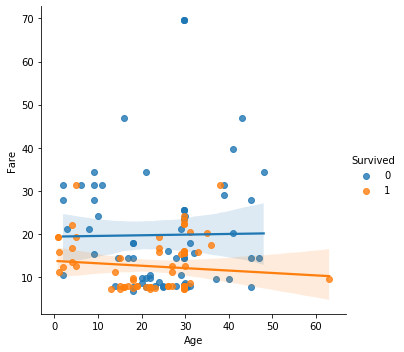

In [49]:
sb.lmplot('Age', 'Fare', hue='Survived', data=train[(train.Sex == 'female') & (train.Pclass ==3)], fit_reg=True);

## Random Forest

### Given by tutorial (0.801, 0.775)
https://www.kaggle.com/alexisbcook/titanic-tutorial

In [50]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train[features], train['Survived'])
predictions = model.predict(X_test[features])

In [51]:
cv = cross_validate(model, X_train[features], y_train)    

In [52]:
cv['test_score'].mean()

0.8013684012303057

In [53]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Tutorial_rf.csv', index=False)

### short features (0.825, 0.749)

In [54]:
model = RandomForestClassifier(n_estimators=100, max_depth=5)
cv = cross_validate(model, X_train[short], y_train)
cv

{'fit_time': array([0.2204628 , 0.23235583, 0.21691084, 0.1882658 , 0.20132518]),
 'score_time': array([0.0133791 , 0.01537728, 0.01395297, 0.01167011, 0.01253676]),
 'test_score': array([0.79329609, 0.82022472, 0.82022472, 0.79775281, 0.84831461])}

In [55]:
cv['test_score'].mean()

0.8159625886636117

In [56]:
def view_scores_2d(index, column):
    data = []
    for a in index:
        scores = []
        for m in column:
            model = RandomForestClassifier(n_estimators= a, max_depth=m)
            cv = cross_validate(model, X_train[short], y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);
    print(df)           

            5         7         9        11
2    0.804745  0.802517  0.791243  0.785707
5    0.810332  0.807018  0.830557  0.813709
8    0.811481  0.819340  0.829465  0.823834
10   0.805894  0.820451  0.826100  0.824964
20   0.809265  0.816013  0.823834  0.814858
30   0.809252  0.820451  0.831687  0.829439
40   0.820426  0.819333  0.827199  0.820457
50   0.807030  0.822698  0.824945  0.819346
60   0.802567  0.830563  0.824951  0.822736
80   0.819340  0.824945  0.833921  0.827205
100  0.810351  0.824945  0.822704  0.824964


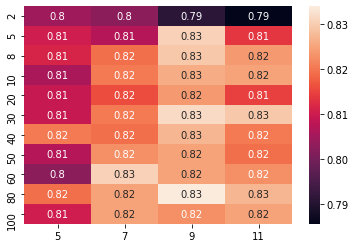

In [57]:
n_est = [2, 5, 8, 10, 20, 30, 40, 50, 60, 80, 100]
depths = range(5, 12, 2)
view_scores_2d(n_est, depths)

           6         7         8         9        10
8   0.802530  0.821587  0.829446  0.819333  0.824970
9   0.814870  0.820463  0.828322  0.822679  0.815994
10  0.807018  0.819333  0.830557  0.822717  0.814826
11  0.812617  0.819327  0.826050  0.829439  0.823815


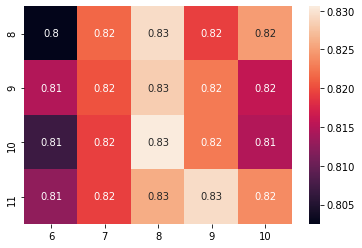

In [58]:
n_est = range(8, 12)
depths = range(6, 11)
view_scores_2d(n_est, depths)

In [59]:
model = RandomForestClassifier(n_estimators=10, max_depth=9)
model.fit(X_train[short], y_train)
predictions = model.predict(X_test[short])

In [60]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Random_forest.csv', index=False)

Kaggle score: 0.749

### All features (0.811, 0.718)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [62]:
param_distributions = {'n_estimators': randint(2, 6), 'max_depth': randint(1, 12)}

In [63]:
search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            n_iter=100,
                            param_distributions=param_distributions)
                            #random_state=0)
search.fit(X_train, y_train);

In [64]:
search.best_params_   

{'max_depth': 8, 'n_estimators': 5}

In [65]:
search.best_score_   

0.8260435628648548

In [66]:
model = RandomForestClassifier(n_estimators = 5, max_depth = 11)
cv = cross_validate(model, X_train[features], y_train)
cv['test_score'].mean()

0.7822861088443915

In [67]:
model = RandomForestClassifier(n_estimators = 5, max_depth = 11)
cv = cross_validate(model, X_train[short], y_train)
cv['test_score'].mean()

0.8002510827945514

In [68]:
model = RandomForestClassifier(n_estimators= 5, max_depth = 11)
cv = cross_validate(model, X_train, y_train)
cv['test_score'].mean()

0.8148327160881301

In [69]:
predictions = GauNB.fit(X_train, y_train).predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Random_Forest_all', index=False)

Kaggle score: 0.718

### Continuous Features (0.794, -)

In [70]:
search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            n_iter=10,
                            param_distributions=param_distributions)
                            #random_state=0)
search.fit(X_train.drop(columns = continuous_features), y_train);

In [71]:
search.best_score_   

0.80248571966606

In [72]:
search.best_params_   ## the more the better

{'max_depth': 4, 'n_estimators': 5}

## Bagging + KNN

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [74]:
def view_scores_2d(index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            bagging = BaggingClassifier(KNeighborsClassifier(),max_samples= a, max_features= m)
            cv = cross_validate(bagging, X, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);

In [75]:
cv = cross_validate(bagging, X_train, y_train)
cv

{'fit_time': array([0.02440214, 0.01982379, 0.01487517, 0.02447319, 0.01620102]),
 'score_time': array([0.01666784, 0.01598215, 0.01753974, 0.02118611, 0.014328  ]),
 'test_score': array([0.70391061, 0.78089888, 0.78651685, 0.78651685, 0.85393258])}

### short features (0.82, 0.751)

In [76]:
cv = cross_validate(bagging, X_train[short], y_train)
cv

{'fit_time': array([0.01779389, 0.01700306, 0.01520181, 0.03275013, 0.02438021]),
 'score_time': array([0.01274395, 0.01315784, 0.01324511, 0.02053905, 0.01792002]),
 'test_score': array([0.63687151, 0.79213483, 0.74719101, 0.78651685, 0.83146067])}

In [77]:
cv['test_score'].mean()

0.7588349758332811

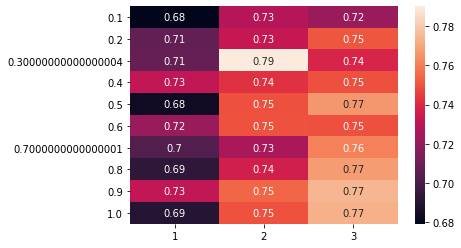

In [78]:
learning_rates = np.linspace(0.1, 1, 10)
depths = [1,2,3]
view_scores_2d(learning_rates, depths, X_train[short])

In [79]:
def view_scores_2d(index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            bagging = BaggingClassifier(KNeighborsClassifier(),max_samples= a, max_features= m)
            cv = cross_validate(bagging, X, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);
    #print(df)    

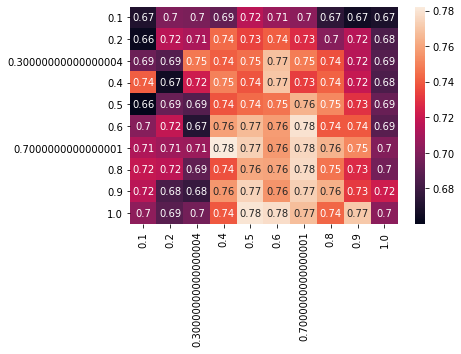

In [80]:
index = np.linspace(0.1, 1, 10)
column = np.linspace(0.1, 1, 10)
view_scores_2d(index, column, X_train[short])

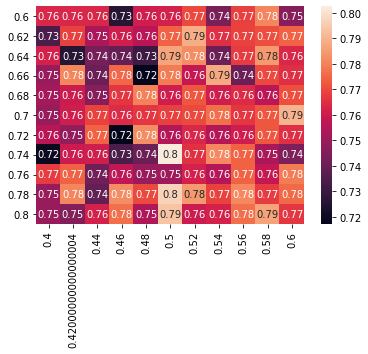

In [81]:
index = np.linspace(0.6, 0.8, 11)
column = np.linspace(0.4, 0.6, 11)
view_scores_2d(index, column, X_train[short])

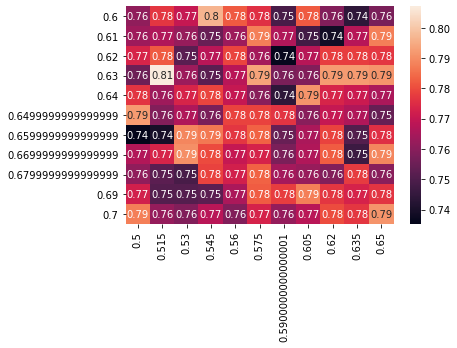

In [82]:
index = np.linspace(0.6, 0.7, 11)
column = np.linspace(0.5, 0.65, 11)
view_scores_2d(index, column, X_train[short])

In [83]:
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples= 0.66, max_features= 0.58)
predictions = bagging.fit(X_train[short], y_train).predict(X_test[short])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('KNN_short.csv', index=False)

Kaggle score: 0.751

### tutorial features (0.81, 0.773)

In [84]:
cv = cross_validate(bagging, X_train[features], y_train)
cv['test_score'].mean()

0.791224656330425

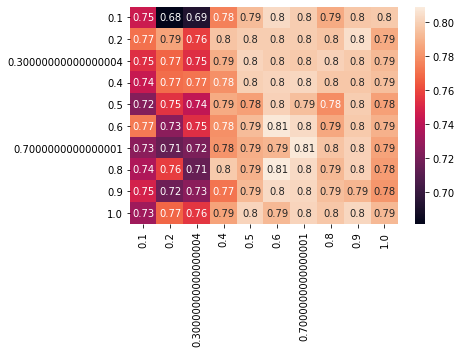

In [85]:
index = np.linspace(0.1, 1, 10)
column = np.linspace(0.1, 1, 10)
view_scores_2d(index, column, X_train[features])

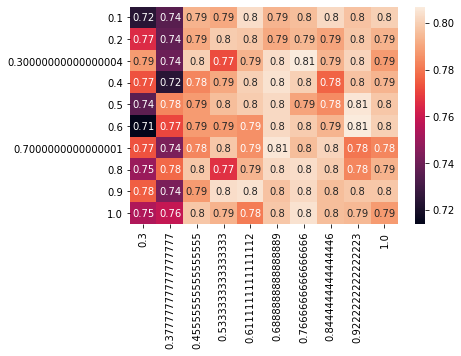

In [86]:
index = np.linspace(0.1, 1, 10)
column = np.linspace(0.3, 1, 10)
view_scores_2d(index, column, X_train[features])

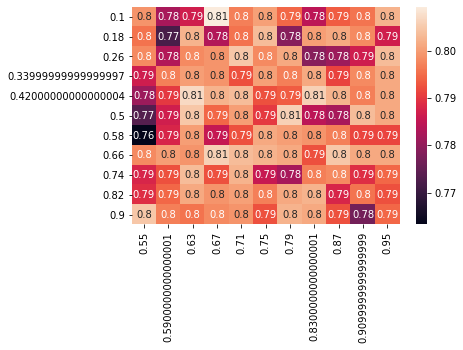

In [87]:
index = np.linspace(0.1, 0.9, 11)
column = np.linspace(0.55, 0.95, 11)
view_scores_2d(index, column, X_train[features])

In [88]:
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples= 0.42, max_features= 0.75)
predictions = bagging.fit(X_train[features], y_train).predict(X_test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('KNN_tutorial.csv', index=False)

Kaggle score: 0.77272

## Extra-Tree classifier

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500, max_depth=5, min_samples_split=2)
etc.fit(X_train1, y_train1)
etc.score(X_train2, y_train2)

0.7802690582959642

In [90]:
etc.feature_importances_

array([1.06784718e-01, 2.78514940e-02, 2.23152969e-02, 1.86909122e-02,
       2.42713905e-02, 3.14647316e-01, 2.98897091e-01, 1.27843878e-03,
       1.20164379e-02, 4.45396679e-03, 4.65656901e-03, 2.26150173e-02,
       3.69962299e-03, 1.07955991e-03, 0.00000000e+00, 9.24910394e-02,
       1.90217653e-02, 8.94735371e-05, 7.24888693e-03, 1.78910027e-02])

In [91]:
def view_scores_2d(index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            etc = ExtraTreesClassifier(n_estimators=500, max_depth=a, min_samples_split=m)
            cv = cross_validate(etc, X_train, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);
    #print(df)    

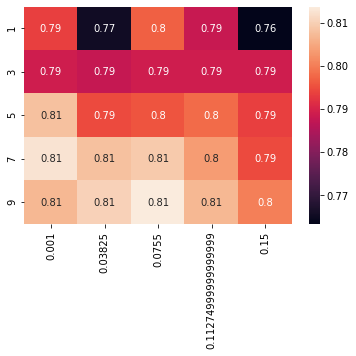

In [92]:
index = range(1, 11, 2)
column = np.linspace(0.001, 0.15, 5)
view_scores_2d(index, column, X_train)

## AdaBoost

### Simple trial

In [93]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators= 20, learning_rate = 0.5)
clf.fit(X_train1, y_train1)
clf.score(X_train2, y_train2)

0.8071748878923767

In [94]:
clf = AdaBoostClassifier(n_estimators= 20, learning_rate = 0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [95]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('AdaBoostClassifier1.csv', index=False)

### On short features

In [96]:
def view_scores_2d(index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            clf = AdaBoostClassifier(n_estimators= a, learning_rate = m)
            cv = cross_validate(clf, X, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);
    #print(df)    

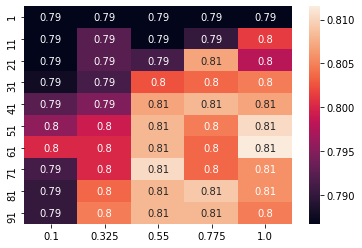

In [97]:
index = range(1, 100, 10)
column = np.linspace(0.1, 1, 5)
view_scores_2d(index, column, X_train[short])

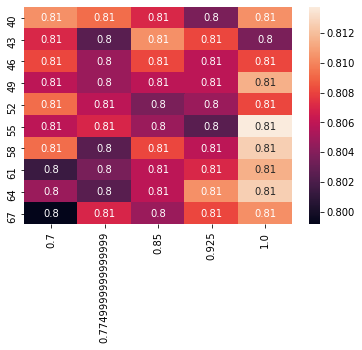

In [98]:
index = range(40, 70, 3)
column = np.linspace(0.7, 1, 5)
view_scores_2d(index, column, X_train[short])

In [99]:
clf = AdaBoostClassifier(n_estimators= 55, learning_rate = 1)
clf.fit(X_train[short], y_train)
y_pred = clf.predict(X_test[short])

In [100]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('AdaBoostClassifier2.csv', index=False)

Kaggle score: 0.75358

### On all features

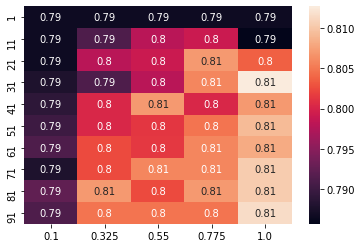

In [101]:
index = range(1, 100, 10)
column = np.linspace(0.1, 1, 5)
view_scores_2d(index, column, X_train)

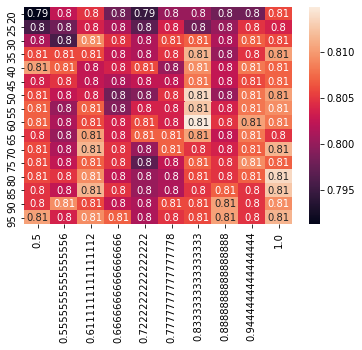

In [102]:
index = range(20, 100, 5)
column = np.linspace(0.5, 1, 10)
view_scores_2d(index, column, X_train)

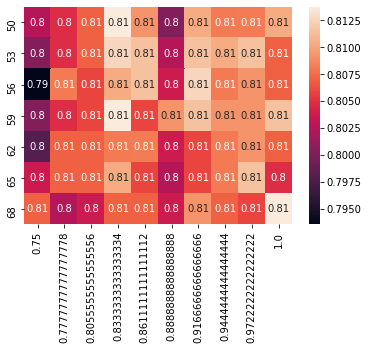

In [103]:
index = range(50, 70, 3)
column = np.linspace(0.75, 1, 10)
view_scores_2d(index, column, X_train)

In [104]:
clf = AdaBoostClassifier(n_estimators= 59, learning_rate = 0.83)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [105]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('AdaBoostClassifier3.csv', index=False)

Kaggle sccore: 0.75119

## Gradient Boosting 

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
cv = cross_validate(clf, X_train, y_train)
cv['test_score'].mean()

0.8170987383089574

In [107]:
def view_scores_2d(n_esti, index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            clf = GradientBoostingClassifier(n_estimators=n_esti, learning_rate = a, max_depth=m)
            cv = cross_validate(clf, X, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);

### All features (0.82, 0.789)

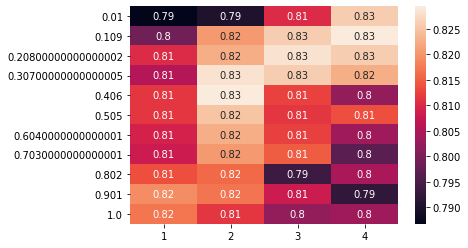

In [108]:
learning_rates = np.linspace(0.01, 1, 11)
depths = [1, 2, 3, 4]
view_scores_2d(100, learning_rates, depths, X_train)

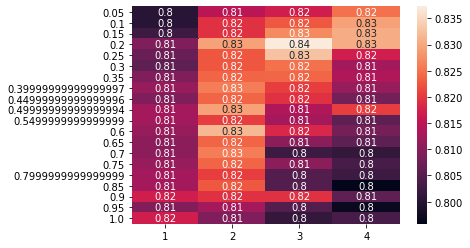

In [109]:
learning_rates = np.linspace(0.05, 1, 20)
depths = [1,2,3,4]
view_scores_2d(100, learning_rates, depths, X_train)

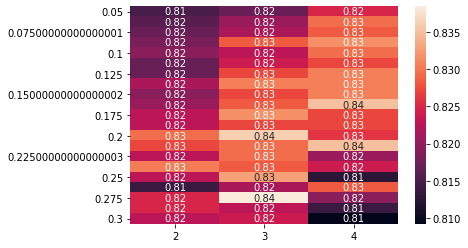

In [110]:
learning_rates = np.linspace(0.05, 0.3, 21)
depths = [2,3,4]
view_scores_2d(100, learning_rates, depths, X_train)

In [111]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3)
cross_validate(clf, X_train, y_train)
predictions = clf.fit(X_train, y_train).predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('gdBoosting3.csv', index=False)

Kaggle score: 0.75358

In [112]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.275, max_depth=3)
cross_validate(clf, X_train, y_train)
predictions = clf.fit(X_train, y_train).predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('gdBoosting4.csv', index=False)

Kaggle score: 0.75598

Now we'll put the best parameter to work 

In [113]:
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_depth=3)
cross_validate(clf, X_train, y_train)
predictions = clf.fit(X_train, y_train).predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('gdBoosting.csv', index=False)

Kaggle score: 0.78947

In [114]:
X_test['Pclass'][3]

3

In [115]:
predictions_update = predictions
for i in range(len(predictions)):
    Pclass = X_test['Pclass'][i]
    female = X_test['Sex_female'][i]
    if Pclass == 1 and female == 1: predictions_update[i] == 1
    if Pclass == 2 and female == 1: predictions_update[i] == 1
    if Pclass == 3 and female == 0: predictions_update[i] == 0    

In [116]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions_update})
output.to_csv('gdBoosting_gender_Pclass.csv', index=False)

In [117]:
sum(predictions_update != predictions)

0

Kaggle score : still 0.78947

Put the second_best parameter to work 

In [118]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8, max_depth=1)
cross_validate(clf, X_train, y_train)

{'fit_time': array([0.09653926, 0.11383009, 0.11852884, 0.06916785, 0.06786108]),
 'score_time': array([0.00505495, 0.00272489, 0.00154185, 0.00173402, 0.00141621]),
 'test_score': array([0.7877095 , 0.80337079, 0.81460674, 0.81460674, 0.84269663])}

In [119]:
predictions = clf.fit(X_train, y_train).predict(X_test)

In [120]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('gdBoosting1.csv', index=False)

Kaggle score: 0.75598

### short features 

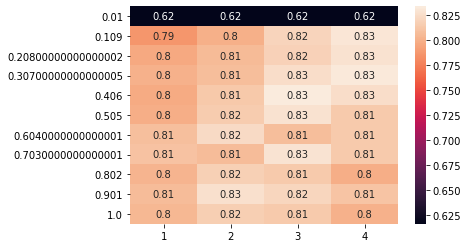

In [121]:
learning_rates = np.linspace(0.01, 1, 11)
depths = [1, 2, 3, 4]
view_scores_2d(20, learning_rates, depths, X_train[short])

### Tutorial features

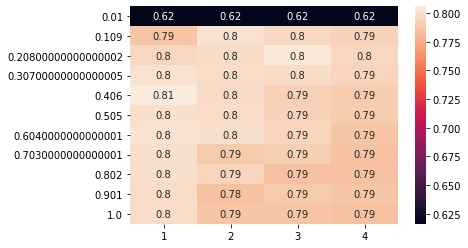

In [122]:
learning_rates = np.linspace(0.01, 1, 11)
depths = [1, 2, 3, 4]
view_scores_2d(20, learning_rates, depths, X_train[features])

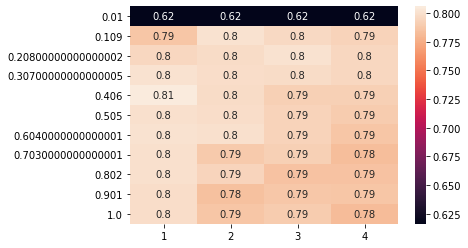

In [123]:
learning_rates = np.linspace(0.01, 1, 11)
depths = [1, 2, 3, 4]
view_scores_2d(20, learning_rates, depths, X_train[features])

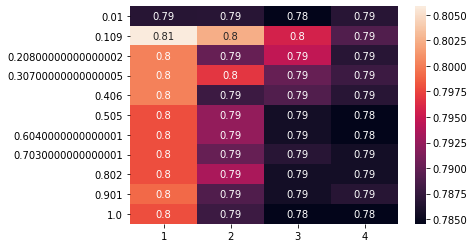

In [124]:
learning_rates = np.linspace(0.01, 1, 11)
depths = [1, 2, 3, 4]
view_scores_2d(100, learning_rates, depths, X_train[features])

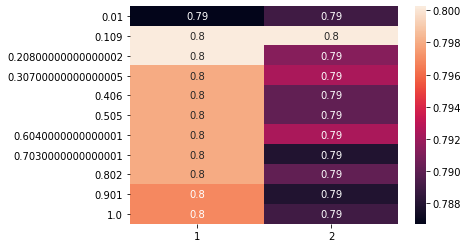

In [125]:
learning_rates = np.linspace(0.01, 1, 11)
depths = [1, 2]
view_scores_2d(200, learning_rates, depths, X_train[features])

## XgBoost

In [126]:
import xgboost as xgb

In [127]:
clf = xgb.XGBClassifier()
clf.fit(X_train1, y_train1)
clf.score(X_train2, y_train2)

0.7757847533632287

In [128]:
param_dist = {
        'n_estimators':range(80,200,30),
        'max_depth':range(2,15,4),
        'learning_rate':np.linspace(0.01,2.0, 3),
        'subsample':np.linspace(0.7,0.9,4),
        'colsample_bytree':np.linspace(0.5,0.98,3),
        'min_child_weight':range(1,9,4)
        }

In [129]:
grid = GridSearchCV(clf ,param_dist,cv = 3)

In [130]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_job...
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': array([0.5 , 0.74, 0.98]),
                         'learning_rate': array([0.01 , 1.005, 2.   ]),
                         'max_depth': ra

In [131]:
grid.best_params_   

{'colsample_bytree': 0.74,
 'learning_rate': 1.005,
 'max_depth': 2,
 'min_child_weight': 5,
 'n_estimators': 170,
 'subsample': 0.7}

In [132]:
grid.best_score_    

0.8361391694725029

In [133]:
param_dist = {
        'n_estimators':range(80,200,30),
        'max_depth':range(2,15,4),
        'learning_rate':np.linspace(0.01, 2.0, 5),
        'subsample':np.linspace(0.7, 0.9, 5),
        'colsample_bytree':np.linspace(0.5, 0.98, 4),
        'min_child_weight':range(1, 9, 4)
        }
grid = GridSearchCV(clf ,param_dist,cv = 3)
grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)

{'colsample_bytree': 0.8200000000000001, 'learning_rate': 0.5075, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 80, 'subsample': 0.9} 0.8462401795735129


In [134]:
clf = xgb.XGBClassifier(colsample_bytree= 0.82, learning_rate= 0.5075, max_depth= 6, 
                        min_child_weight= 5, n_estimators= 80, subsample= 0.9)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [135]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('xgb.csv', index=False)

## Conclusion


|method     | Naive  Bayes | SVC |RF Tutorial| RF  | KNN  |ExtraTree|gradient Boosting| xgb |
|:-:        | :-           | :-  | -:        | -:  |-:   | -:   | -:              |  -: |
| score (random)    | 0.787        |0.687| 0.799     |0.826| 0.8 | 0.79 | 0.82            |0.77 |
| on Kaggle |        -     |   - | 0.775     |0.749| 0.751|  -   | 0.789           |0.756|


The best score I got is 0.789 by gradient Boosting. 

## Visualization

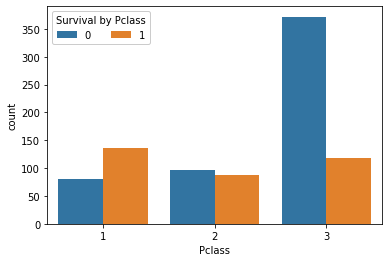

In [136]:
ax = sb.countplot(data = train, x = 'Pclass', hue = 'Survived');
ax.legend(loc = 'upper left', ncol = 2, framealpha = 1, title = 'Survival by Pclass');

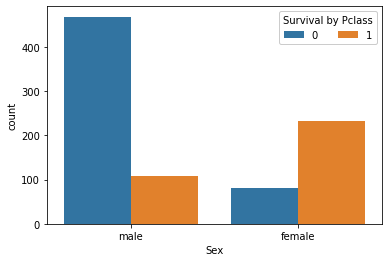

In [137]:
ax = sb.countplot(data = train, x = 'Sex', hue = 'Survived');
ax.legend(loc = 'upper right', ncol = 2, framealpha = 1, title = 'Survival by Pclass');

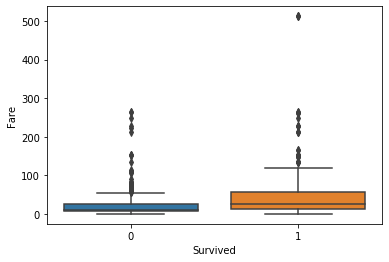

In [138]:
sb.boxplot(data = train, x = 'Survived', y = 'Fare');

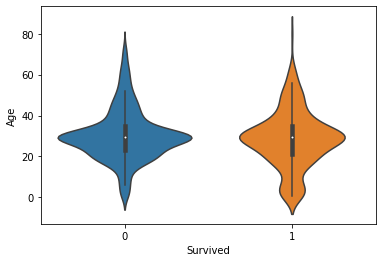

In [139]:
sb.violinplot(data = train, x = 'Survived', y = 'Age');

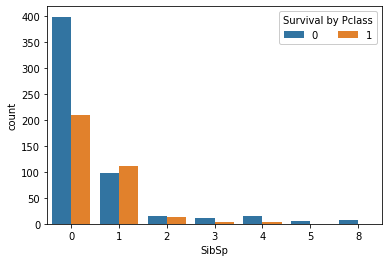

In [140]:
ax = sb.countplot(data = train, x = 'SibSp', hue = 'Survived');
ax.legend(loc = 'upper right', ncol = 2, framealpha = 1, title = 'Survival by Pclass');

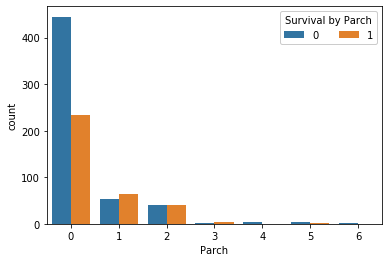

In [141]:
ax = sb.countplot(data = train, x = 'Parch', hue = 'Survived');
ax.legend(loc = 'upper right', ncol = 2, framealpha = 1, title = 'Survival by Parch');

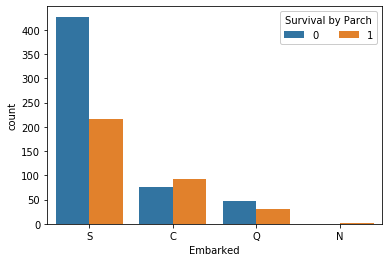

In [142]:
ax = sb.countplot(data = train, x = 'Embarked', hue = 'Survived');
ax.legend(loc = 'upper right', ncol = 2, framealpha = 1, title = 'Survival by Parch');